<a href="https://colab.research.google.com/github/04-5h/ecole/blob/main/Text_mining_project_2022_%EA%B2%BD%EC%84%B1%EB%8C%80_yamada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text Mining (English) Project Code

*   목표: 트위터 데이터를 수집하고 다양한 텍스트 분석 방법으로 분석하고 의미있는 결과를 얻자


*   Crawling
*   전처리
*   Word Cloud
*   감성분석
*   토픽분석









# SNS crawling를 사용하고 데이터 수집


*   snscrape를 사용 (https://github.com/JustAnotherArchivist/snscrape)


In [101]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [102]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools

In [103]:
#검색하고 싶은 단어
search_word = "busan"

#검색하는 기간
start_day = "2022-10-13"
end_day = "2022-10-14"

search_query = search_word + ' since:' + start_day + ' until:' + end_day 

#지정한 기간에서 검색하고 싶은 단어를 포함한 tweet를 취득
scraped_tweets = sntwitter.TwitterSearchScraper(search_query).get_items()

In [104]:
#처음부터 100개의 tweets를 취득
sliced_scraped_tweets = itertools.islice(scraped_tweets, 100)

In [105]:
#pandas DataFrame으로 변환
df = pd.DataFrame(sliced_scraped_tweets)

In [106]:
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/ygtmrrow/status/1580709959...,2022-10-13 23:59:57+00:00,me deprimo en tiktok viendo que todas se fuero...,1580709959850815488,ygtmrrow,[],,[],
1,https://twitter.com/armycaratdeul/status/15807...,2022-10-13 23:59:57+00:00,@hobibisa hii are you going to attend the conc...,1580709959825620992,armycaratdeul,[],,[],
2,https://twitter.com/valeriaalexaro1/status/158...,2022-10-13 23:59:56+00:00,Que envidia a las personas que estan en Busan 😔,1580709958256975872,valeriaalexaro1,[],,[],
3,https://twitter.com/arari_pardo/status/1580709...,2022-10-13 23:59:52+00:00,Yo quería ir al concierto en Busan 😭😭,1580709940854804481,arari_pardo,[],,[],
4,https://twitter.com/abcdefnof/status/158070992...,2022-10-13 23:59:48+00:00,ttp streaming di era gempuran goes to busan ck...,1580709924509999105,abcdefnof,[],,[],
...,...,...,...,...,...,...,...,...,...
95,https://twitter.com/yoongitotqm/status/1580708...,2022-10-13 23:55:45+00:00,Tengo la esperanza que en el concierto de Busa...,1580708904740487168,yoongitotqm,[],,[],
96,https://twitter.com/yukiii_sun/status/15807088...,2022-10-13 23:55:43+00:00,"I can't sleep 😍😍😍😍😍😍😍😍😍 I'm gonna s word, my f...",1580708895504601088,yukiii_sun,[],,[],
97,https://twitter.com/syaweees/status/1580708852...,2022-10-13 23:55:33+00:00,"potangena busan exhibit, last chance &amp; onl...",1580708852709801984,syaweees,[],,[],
98,https://twitter.com/BangtanVzla/status/1580708...,2022-10-13 23:55:30+00:00,[💜VeArmy To Busan💜]\n\nDamos inicio al 1er día...,1580708841351630849,BangtanVzla,[],,[],


# content에 keyword가 없고 username에 keyword가 있는 경우도 있어서 그런 경우를 제거하자

In [107]:
df = df[df['content'].str.contains('busan|Busan|BUSAN')]
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/ygtmrrow/status/1580709959...,2022-10-13 23:59:57+00:00,me deprimo en tiktok viendo que todas se fuero...,1580709959850815488,ygtmrrow,[],,[],
1,https://twitter.com/armycaratdeul/status/15807...,2022-10-13 23:59:57+00:00,@hobibisa hii are you going to attend the conc...,1580709959825620992,armycaratdeul,[],,[],
2,https://twitter.com/valeriaalexaro1/status/158...,2022-10-13 23:59:56+00:00,Que envidia a las personas que estan en Busan 😔,1580709958256975872,valeriaalexaro1,[],,[],
3,https://twitter.com/arari_pardo/status/1580709...,2022-10-13 23:59:52+00:00,Yo quería ir al concierto en Busan 😭😭,1580709940854804481,arari_pardo,[],,[],
4,https://twitter.com/abcdefnof/status/158070992...,2022-10-13 23:59:48+00:00,ttp streaming di era gempuran goes to busan ck...,1580709924509999105,abcdefnof,[],,[],
...,...,...,...,...,...,...,...,...,...
94,https://twitter.com/moonbyher/status/158070894...,2022-10-13 23:55:54+00:00,D-1 ytc concert busan... 🥹,1580708942464036864,moonbyher,[],,[],
95,https://twitter.com/yoongitotqm/status/1580708...,2022-10-13 23:55:45+00:00,Tengo la esperanza que en el concierto de Busa...,1580708904740487168,yoongitotqm,[],,[],
96,https://twitter.com/yukiii_sun/status/15807088...,2022-10-13 23:55:43+00:00,"I can't sleep 😍😍😍😍😍😍😍😍😍 I'm gonna s word, my f...",1580708895504601088,yukiii_sun,[],,[],
97,https://twitter.com/syaweees/status/1580708852...,2022-10-13 23:55:33+00:00,"potangena busan exhibit, last chance &amp; onl...",1580708852709801984,syaweees,[],,[],


# 텍스트 데이터를 전처리

In [108]:
# df의 열 정보를 확인
df.columns

Index(['url', 'date', 'content', 'id', 'username', 'outlinks', 'outlinksss',
       'tcooutlinks', 'tcooutlinksss'],
      dtype='object')

In [109]:
#data frame에서 텍스트 데이터 열만 추출
df.content

0     me deprimo en tiktok viendo que todas se fuero...
1     @hobibisa hii are you going to attend the conc...
2       Que envidia a las personas que estan en Busan 😔
3                 Yo quería ir al concierto en Busan 😭😭
4     ttp streaming di era gempuran goes to busan ck...
                            ...                        
94                           D-1 ytc concert busan... 🥹
95    Tengo la esperanza que en el concierto de Busa...
96    I can't sleep 😍😍😍😍😍😍😍😍😍 I'm gonna s word, my f...
97    potangena busan exhibit, last chance &amp; onl...
98    [💜VeArmy To Busan💜]\n\nDamos inicio al 1er día...
Name: content, Length: 67, dtype: object

In [110]:
# 각 트위트의 특징을 확인
for tweet in df.content:
  print(tweet)

me deprimo en tiktok viendo que todas se fueron a corea para ir al concierto de busan, jesus sufro

I'm voting for BTS (@BTS) for Favorite Pop Duo or Group at the #AMAs
@hobibisa hii are you going to attend the concert in busan? can i have a request pleaseee? 🥺
Que envidia a las personas que estan en Busan 😔
Yo quería ir al concierto en Busan 😭😭
ttp streaming di era gempuran goes to busan ck https://t.co/BlufBKL6aV
j-hope on Weverse | 221014

🐿: Before going to sleep heart like this to🫰
ARMY, please look forward to the Busan concert heart.🫰

📍https://t.co/WODI8sb2mf
#BTS #방탄소년단 @BTS_twt https://t.co/C9hWkRruQd
釜山に行かれるアミの皆さま
、どうぞ気をつけて行ってらっしゃい～！
私は釜山に近い福岡でTVで応援😆楽しみます💜
#bts #Busan
221013 ; #HOSEOK 🐿 ~23:22[KST] 
 Historia de Instagram (6) 🎬🐥🏟️

#uarmyhope: Busan cutie Jimin
#uarmyhope: Lindo Jimin de Busan

📍https://t.co/glLgd9LZqv
#jhope #제이홉 #Jimin #지민 https://t.co/4j12fBZFhQ
Sana nasa busan din ako ngayon ☹️
cada vez q entro a tiktok m aparecen videos de armys en busan, BASTA, QUIEREN 

# 불요어(stop words)랑 불필요한 기호 등을 제거

In [111]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [112]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [113]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

불요어 추가

In [114]:
stop_words = stopwords.words('english')
print(stop_words)
stop_words.extend(["rt",'BUSAN']) ###여기서  필요한 stopwords추가
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [115]:
import re
# 트위터분석을 위한 기본적인 텍스트 cleaning 함수
def CleanText(readData, Num=True, Eng=True):
    # Remove Retweets
    text = re.sub('RT @[\w_]+: ', '', readData)
    # Remove Mentions
    text = re.sub('@[\w_]+', '', text)
    # Remove or Replace URL
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ',
                  text)  # http로 시작되는 url
    text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ',
                  text)  # http로 시작되지 않는 url
    # Remove only hashtag simbol "#" because hashtag contains huge information
    text = re.sub(r'#', ' ', text)
    # Remove Garbage Words (ex. &lt, &gt, etc)
    text = re.sub('[&]+[a-z]+', ' ', text)
    # Remove Special Characters
    text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)
    # Remove 출처 by yamada
    text = re.sub(r"(출처.*)", ' ', text)
    # Remove newline
    text = text.replace('\n', ' ')

    if Num is True:
        # Remove Numbers
        text = re.sub(r'\d+', ' ', text)

    if Eng is True:
        # Remove English
        text = re.sub('[a-zA-Z]', ' ', text)

    # Remove multi spacing & Reform sentence
    text = ' '.join(text.split())

    return text


tweet를 하나하나 불러오고 stopwords를 제거

In [116]:
cleaned_tweets_all = []

for tweet in df.content:
  cleaned_tweet = []
  cleaned_tweet_string = CleanText(tweet, Num=True, Eng=False)
  tweet_tokens = word_tokenize(cleaned_tweet_string)
  for token in tweet_tokens:
    if token.lower() not in stop_words:
      cleaned_tweet.append(token)

  print("---------------------")
  print("전처리 전:", word_tokenize(tweet))
  print("전처리 후:", cleaned_tweet)
  print("---------------------")
  cleaned_tweets_all.append(cleaned_tweet)

---------------------
전처리 전: ['me', 'deprimo', 'en', 'tiktok', 'viendo', 'que', 'todas', 'se', 'fueron', 'a', 'corea', 'para', 'ir', 'al', 'concierto', 'de', 'busan', ',', 'jesus', 'sufro', 'I', "'m", 'voting', 'for', 'BTS', '(', '@', 'BTS', ')', 'for', 'Favorite', 'Pop', 'Duo', 'or', 'Group', 'at', 'the', '#', 'AMAs']
전처리 후: ['deprimo', 'en', 'tiktok', 'viendo', 'que', 'todas', 'se', 'fueron', 'corea', 'para', 'ir', 'al', 'concierto', 'de', 'busan', 'jesus', 'sufro', 'voting', 'BTS', 'Favorite', 'Pop', 'Duo', 'Group', 'AMAs']
---------------------
---------------------
전처리 전: ['@', 'hobibisa', 'hii', 'are', 'you', 'going', 'to', 'attend', 'the', 'concert', 'in', 'busan', '?', 'can', 'i', 'have', 'a', 'request', 'pleaseee', '?', '🥺']
전처리 후: ['hii', 'going', 'attend', 'concert', 'busan', 'request', 'pleaseee']
---------------------
---------------------
전처리 전: ['Que', 'envidia', 'a', 'las', 'personas', 'que', 'estan', 'en', 'Busan', '😔']
전처리 후: ['Que', 'envidia', 'las', 'personas', 'que

In [117]:
len(cleaned_tweets_all)

67

# (Option) 한국어로 텍스트 전처리 하고 싶을 때...


*   konlpy (https://konlpy.org/ko/latest/index.html)
*   (추천)customized_konlpy (https://github.com/lovit/customized_konlpy)



In [118]:
!pip install customized_konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [119]:
from ckonlpy.tag import Twitter

In [120]:
twitter = Twitter()
twitter.pos("안녕하세요. 저는 인공지능 입니다.")

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('안녕', 'Noun'),
 ('하세요', 'Verb'),
 ('.', 'Punctuation'),
 ('저', 'Noun'),
 ('는', 'Josa'),
 ('인공', 'Noun'),
 ('지능', 'Noun'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation')]

# 새로운 단어를 형태소 분석기가 참조하는 사전에 추가하는 방법

In [121]:
#"인공지능"을 한 단어로 인식 시키기 위해 사전에 추가 해서 처리
twitter.add_dictionary(['인공지능'], 'Noun')

In [122]:
#사전에 "인공지능"이 추가된 효과가 반영
twitter.pos("안녕하세요, 저는 인공지능 입니다.")

[('안녕', 'Noun'),
 ('하세요', 'Verb'),
 (',', 'Punctuation'),
 ('저', 'Noun'),
 ('는', 'Josa'),
 ('인공지능', 'Noun'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation')]

불요어(stopwords) 제거

In [123]:
from ckonlpy.tag import Postprocessor

In [124]:
stopwords = {"저", "는"}
postprocessor = Postprocessor(twitter, stopwords=stopwords)
postprocessor.pos("안녕하세요, 저는 인공지능 입니다.")

[('안녕', 'Noun'),
 ('하세요', 'Verb'),
 (',', 'Punctuation'),
 ('인공지능', 'Noun'),
 ('입니다', 'Adjective'),
 ('.', 'Punctuation')]

명사("Noun")만 보고 싶어

In [125]:
passtags = {'Noun'}
postprocessor = Postprocessor(twitter, stopwords=stopwords, passtags=passtags)
postprocessor.pos("안녕하세요, 저는 인공지능 입니다.")

[('안녕', 'Noun'), ('인공지능', 'Noun')]

나머지 기능은 홈페이지 (https://github.com/lovit/customized_konlpy) 참조

# Word Cloud 만들기

In [126]:
!pip install nltk
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [127]:
from wordcloud import WordCloud
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# word cloud를 만드는 함수를 생성

In [128]:
def generate_wordcloud(text): 
    wordcloud = WordCloud(
                          width=800, height=400,
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of'} #제거하고 싶은 단어를 여기에 입력
                          ).generate(text)
    
    fig = plt.figure(1, figsize=(8, 4))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.axis("off")

Word Cloud를 위해 단어의 리스트 모든 단어를 한 문자열으로 연결

In [129]:
all_words = []
for cleaned_tweet in cleaned_tweets_all:
  for word in cleaned_tweet:
    all_words.append(word)

all_words_str = ' '.join(all_words)

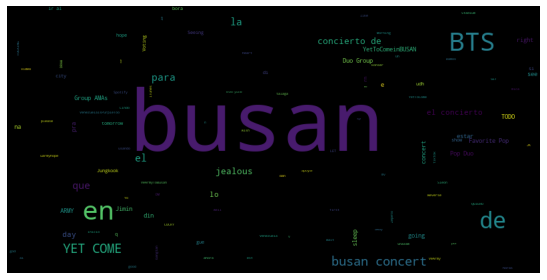

In [130]:
generate_wordcloud(all_words_str)

In [131]:
!apt-get install fonts-nanum*
!apt-get install fontconfig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fontconfig is already the newest version (2.12.6-0ubuntu2).
The following pa

In [132]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
def generate_wordcloud_korean(text): 
    wordcloud = WordCloud(
                          font_path = FONT_PATH,
                          width=800, height=400,
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of'} #제거하고 싶은 단어를 여기에 입력
                          ).generate(text)
    
    fig = plt.figure(1, figsize=(8, 4))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.axis("off")

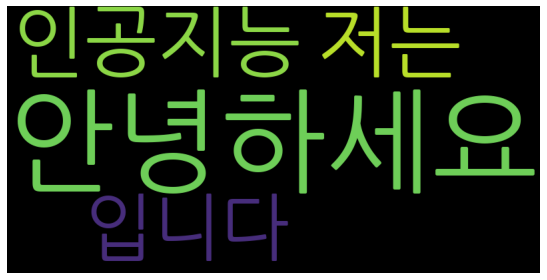

In [133]:
generate_wordcloud_korean("안녕하세요, 저는 인공지능 입니다.")

# 감성분석

In [134]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [135]:
import nltk
nltk.download([ "stopwords",  "vader_lexicon"])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [136]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')
print(stop_words)
stop_words.extend(["rt"]) ###여기서  필요한 stopwords추가
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

sentiment analysis check

In [137]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, NLTK is really powerful!")

{'neg': 0.0, 'neu': 0.295, 'pos': 0.705, 'compound': 0.8012}

# (option) 한국어로 간단하게 감성분석 하는 방법:google Translate

In [138]:
!pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
from googletrans import Translator
translator = Translator()
original_text = '안녕하세요. 역시 파이썬은 너무 좋네요'
translations = translator.translate(original_text, 'en')
print(original_text)
print(translations.text)
translated_text = translations.text

sia = SentimentIntensityAnalyzer()
sia.polarity_scores(translated_text)

안녕하세요. 역시 파이썬은 너무 좋네요
hello.After all, Python is so good


{'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'compound': 0.5777}

# 데이터셋 전체에 대해서 Sentiment Analysis 실행

In [140]:
sentiment_result = []

for tweet in df.content:
  cleaned_tweet = []
  cleaned_tweet_string = CleanText(tweet, Num=True, Eng=False)
  tweet_tokens = word_tokenize(cleaned_tweet_string)
  for token in tweet_tokens:
    if token.lower() not in stop_words:
      cleaned_tweet.append(token)

  cleaned_tweet_str = ' '.join(cleaned_tweet)
  print("전처리 전: " + tweet)
  print("전처리 후: " + cleaned_tweet_str)
  print(sia.polarity_scores(cleaned_tweet_str))

  #positive or negative 분류 compound score가 0 보다 크면 positive, 이하는 negative로 함
  compound_point = sia.polarity_scores(cleaned_tweet_str)['compound']
  if compound_point > 0:
    sentiment_result.append('Positive')

  else:
    sentiment_result.append('Negative')

전처리 전: me deprimo en tiktok viendo que todas se fueron a corea para ir al concierto de busan, jesus sufro

I'm voting for BTS (@BTS) for Favorite Pop Duo or Group at the #AMAs
전처리 후: deprimo en tiktok viendo que todas se fueron corea para ir al concierto de busan jesus sufro voting BTS Favorite Pop Duo Group AMAs
{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.4588}
전처리 전: @hobibisa hii are you going to attend the concert in busan? can i have a request pleaseee? 🥺
전처리 후: hii going attend concert busan request pleaseee
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
전처리 전: Que envidia a las personas que estan en Busan 😔
전처리 후: Que envidia las personas que estan en Busan
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
전처리 전: Yo quería ir al concierto en Busan 😭😭
전처리 후: Yo quer ir al concierto en Busan
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
전처리 전: ttp streaming di era gempuran goes to busan ck https://t.co/BlufBKL6aV
전처리 후: ttp streaming di era gempuran g

감성분석의 시각화

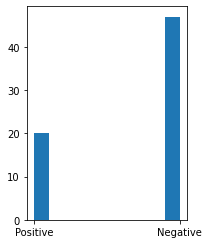

In [141]:
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [3.0, 3.50]
plt.rcParams["figure.autolayout"] = True

# Plot bar chart with data points
plt.hist(sentiment_result)

# Display the plot
plt.show()

# Topic Analysis

In [94]:
!pip install gensim
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [96]:
import gensim
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaSeqModel, LdaModel

In [97]:
cleaned_tweets_all = []

for tweet in df.content:
  cleaned_tweet = []
  cleaned_tweet_string = CleanText(tweet, Num=True, Eng=False)
  tweet_tokens = word_tokenize(cleaned_tweet_string)
  for token in tweet_tokens:
    if token.lower() not in stop_words:
      cleaned_tweet.append(token)

  # print("---------------------")
  # print("전처리 전:", word_tokenize(tweet))
  # print("전처리 후:", cleaned_tweet)
  # print("---------------------")
  cleaned_tweets_all.append(cleaned_tweet)

In [98]:
id2word = Dictionary(cleaned_tweets_all)
corpus = [id2word.doc2bow(text) for text in cleaned_tweets_all]

In [99]:
topic_number = 10 #10개의 topic group로 나눔

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=topic_number,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)

In [100]:
for topic_topwords in lda_model.print_topics():
  print(topic_topwords)

(0, '0.032*"bts" + 0.021*"los" + 0.021*"el" + 0.021*"de" + 0.011*"morning" + 0.011*"good" + 0.011*"busan" + 0.011*"todos" + 0.011*"Las" + 0.011*"ES"')
(1, '0.043*"busan" + 0.022*"de" + 0.022*"el" + 0.012*"en" + 0.011*"los" + 0.011*"n" + 0.011*"concierto" + 0.011*"called" + 0.011*"nueva" + 0.011*"deseos"')
(2, '0.026*"BTS" + 0.026*"Busan" + 0.026*"en" + 0.016*"para" + 0.016*"de" + 0.016*"din" + 0.011*"na" + 0.011*"al" + 0.011*"la" + 0.011*"BUSAN"')
(3, '0.079*"busan" + 0.027*"concert" + 0.014*"right" + 0.014*"en" + 0.014*"god" + 0.007*"BUSAN" + 0.007*"going" + 0.007*"wait" + 0.007*"estar" + 0.007*"rn"')
(4, '0.031*"busan" + 0.026*"de" + 0.023*"concert" + 0.023*"Busan" + 0.023*"BTS" + 0.020*"en" + 0.017*"Duo" + 0.017*"Pop" + 0.017*"Favorite" + 0.017*"Group"')
(5, '0.027*"de" + 0.022*"Busan" + 0.022*"Jimin" + 0.017*"jealous" + 0.017*"Seeing" + 0.017*"busan" + 0.017*"bora" + 0.011*"BUSAN" + 0.011*"uarmyhope" + 0.011*"na"')
(6, '0.030*"Busan" + 0.016*"kerja" + 0.016*"nya" + 0.016*"aku" + 0.

# 향후 방향


*   본인이 조사 하고 싶은 key word를 정해서 분석
*   년도별, 월별의 변화를 관찰

*   토픽별 감성 비교
*   여러개의 key word를 사용해서 결과 비교 (Ex, galaxy vs iphone) 





# 참고자료


*   https://www.nltk.org/
*   https://radimrehurek.com/gensim/

*   https://huggingface.co/ (for Deep Learning Models in NLP)
*   https://en.wikipedia.org/wiki/Word_embedding (Word Embedding 는 현재 NLP에서의 핵심 기술)

*  reference Dr.야마다님



